In [1]:
# Импортируем основные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Читаем первый датасет с данными о пользователях
customers = pd.read_csv('olist_customers_dataset.csv')

In [3]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
# Проводим первичный разведовтельный анализ данных

In [5]:
# Выясняем количество уникальных значений в колонках (значения costomer_id у нас уникальные на всем датасете, это нам пригодится)
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [6]:
# Проверяем датасет на пропущенные значения (пропущенных значений нет)
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
# Читаем второй датасет с данными о заказах, сразу переводим колонки с датой в нужный формат для дальнейшей работы.
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], dayfirst=True)

In [8]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [9]:
# Проверяем типы данных в таблице (колонки успешно переведены в формат даты)
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [10]:
# Смотрим на количество уникальных значений
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [11]:
# Для понимания смотрим на уникальные значения в колонке "order_status", эти данные нам пригодятся при решении вопроса о том, 
# что считать покупкой.
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [12]:
# Проверяем датасет на пропущенные значения (есть пропущенные значения в колонках 'время подтверждения оплаты заказа', 
# 'время доставки товара в логистическую службу' и 'время доставки товара')
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
# Читаем третий датасет с данными о товарах
items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [14]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [15]:
# Смотрим типы данных в датафрейме
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [16]:
# Обращаем внимание на то, что уникальных заказов с таблице 'items' меньше, чем в таблицах 'customers' и 'orders'.
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [17]:
# Проверели датасет на пропущенные значения (пропущенных значений нет)
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [18]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [19]:
# Для принятия решения о том, что мы принимаем за покупку, предварительно посмотрим разбивку заказов по статусу заказа.
orders.groupby('order_status', as_index = False) \
      .agg({'customer_id': 'count'})

,order_status,customer_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [20]:
# Допустим, мы примем за покупку заказы, которые доставлены. Однако мы можем не учесть те заказы,
# которые еще не доставлены, однако уже в процессе сборки и/или отгружены со склада.

In [21]:
# Посмотрим на время оплаты заказа (на какой стадии заказ необходимо оплатить, начинает ли собираться заказ до оплаты и т.д.)
orders.query('order_status == "invoiced"') # Берем заказы со статусом "Выставлен счет на оплату"
# Видим, что заказы с данным статусом уже оплачены. Значит, заказы со всеми дальнейшими статусами будут тоже оплачены вплоть до
# delivered будут тоже оплачены.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17


In [22]:
# Видим, что заказы с данным статусом уже оплачены. Значит, заказы со всеми дальнейшими статусами будут тоже оплачены вплоть до
# delivered будут тоже оплачены. Проверим следующий по порядку статус заказа. Все заказы с таким статусом также оплачены.
orders.query('order_status == "processing"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

In [23]:
# Делаем вывод, что за покупку целесообразно принять заказы со статусами:
# - invoiced 
# - processing
# - shipped
# - delivered
# То есть это заказы, которые оплачены, при этом не отменены и доступны.

МЫ ПРОВЕЛИ РАЗВЕДОВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ:
1. СЧИТАЛИ 3 ДАТАФРЕЙМА, ПОСМОТРЕЛИ НА УНИКАЛЬНЫЕ И ПРОПУЩЕННЫЕ ДАННЫЕ, КОЛИЧЕСТВО СТОЛБЦОВ И СТРОК.
2. ПЕРЕВЕЛИ ЗНАЧЕНИЯ В КОЛОНКАХ В НУЖНЫЙ НАМ ФОРМАТ
3. ВЫЯСНИЛИ, ЧТО МЫ МОЖЕМ ПРИНЯТЬ ЗА ПОКУПКУ.

In [24]:
# Начинаем выполнять поставленные задачи

ЗАДАЧА 1

In [25]:
# Объеденяем датафреймы orders и customers для определения, сколько пользовательей купили только 1 раз.
orders_and_customers = orders.merge(customers, how = 'inner', on = 'customer_id')

In [26]:
orders_and_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [27]:
# Вычисляем количество заказов для каждого пользователя.
# По всей видимости при каждой покупке у каждого пользователя разный 'customer_id', поэтому мы группируем по 'customer_unique_id'
orders_count = orders_and_customers.query('order_status == "invoiced" or order_status == "processing" or order_status == "shipped" or order_status == "delivered"') \
                                   .groupby('customer_unique_id', as_index = False) \
                                   .agg({'order_id': 'count'}) \
                                   .rename(columns = {'order_id': 'orders'})

In [28]:
orders_count

,customer_unique_id,orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94979,fffcf5a5ff07b0908bd4e2dbc735a684,1
94980,fffea47cd6d3cc0a88bd621562a9d061,1
94981,ffff371b4d645b6ecea244b27531430a,1
94982,ffff5962728ec6157033ef9805bacc48,1


In [29]:
# Отбираем пользователей с одним заказом. 
orders_count.query('orders == 1')

,customer_unique_id,orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94979,fffcf5a5ff07b0908bd4e2dbc735a684,1
94980,fffea47cd6d3cc0a88bd621562a9d061,1
94981,ffff371b4d645b6ecea244b27531430a,1
94982,ffff5962728ec6157033ef9805bacc48,1


In [30]:
# Для наглядности можем посчитать процент пользователей, купивших только 1 раз
92097 / 94984 * 100

96.96054072264802

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)
ОТВЕТ: 92097 пользователей, что является приблизительно 97 процентов от всех пользователей, совершавших покупки.

ЗАДАЧА 2

In [31]:
# Для того, чтобы ответить на второй вопрос задачи (Сколько заказов в месяц в среднем не доставляется по разным причинам),
# необходимо перевести колонку order_purchase_timestamp в формат год-месяц.
orders_and_customers['order_purchase_timestamp'] = orders_and_customers["order_purchase_timestamp"].dt.to_period("M")

In [32]:
orders_and_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


Для начала необходимо определиться, что мы будем считать за причины не доставки заказа.
Предполагается, что у нас 2 причины недоставленных заказов (по причине отмены заказа и по причине недоступности заказа)

In [33]:
# Считаем, сколько заказов не доставлено с разбивкой по дате заказа и статусу заказа.
undelivered = orders_and_customers.query('order_status == "unavailable" or order_status == "canceled"') \
                                  .groupby(['order_purchase_timestamp','order_status'], as_index = False) \
                                  .agg({'order_id': 'count'}) \
                                  .rename(columns = {'order_id': 'orders'})

In [34]:
undelivered.head()

,order_purchase_timestamp,order_status,orders
0,2016-09,canceled,2
1,2016-10,canceled,24
2,2016-10,unavailable,7
3,2017-01,canceled,3
4,2017-01,unavailable,10


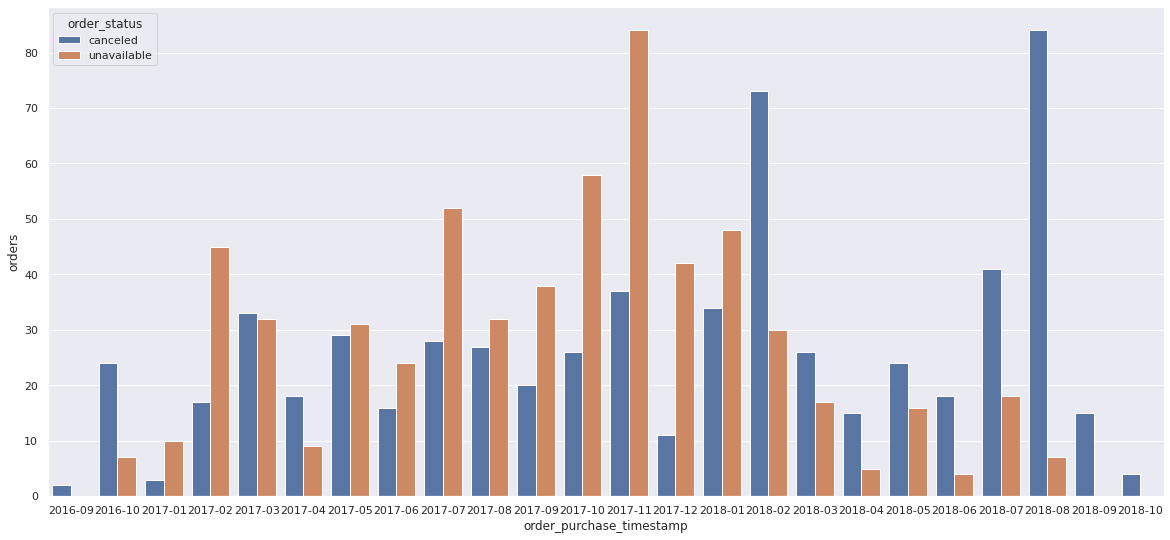

In [35]:
# Для наглядности можем построить график.
sns.set (rc={"figure.figsize": (20, 9)})
sns.barplot(x = undelivered.order_purchase_timestamp, y = undelivered.orders, data = undelivered, hue = undelivered.order_status)

In [36]:
# теперь мы можем посчитать среднее за месяц с разбивкой по статусу заказа.
undelivered.groupby('order_status', as_index = False) \
           .agg({'orders': 'mean'}) \
           .rename(columns = {'orders': 'avg_orders'})

,order_status,avg_orders
0,canceled,26.041667
1,unavailable,29.000000


ОТВЕТ НА ЗАДАНИЕ 2:
ДЕЛАЕМ ВЫВОД, ЧТО В СРЕДНЕМ ЗА МЕСЯЦ ЗАКАЗЫ НЕ ДОСТАВЛЯЮТСЯ ПО ПРИЧИНАМ:
    1. ОТМЕНЫ ЗАКАЗА 26 ЗАКАЗОВ
    2. ЗАКАЗ НЕДОСТУПЕН 29 ЗАКАЗОВ

ЗАДАЧА 3

In [37]:
# Для выполнения задания 3, необходимо подключить к работе датафрейм с товарными позициями.

In [38]:
# Нам необходимо, чтобы в датафрейме с заказами оставались только те заказы, которые мы приняли за покупки.
purchases_orders = orders.query('order_status == "invoiced" or order_status == "processing" or order_status == "shipped" or order_status == "delivered"')

In [39]:
# Объеденим датафрейм с товарными позициями с датафреймом со статусами покупок. Отбираем сразу нужные нам колонки 
items_time = items.merge(purchases_orders, how = 'inner', on = 'order_id')[['product_id', 'order_purchase_timestamp']]

In [40]:
# У нас получается датафрейм с айди товаром и временем создания заказа с этим товаром. 
items_time

,product_id,order_purchase_timestamp
0,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 08:59:02
1,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 10:53:06
2,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:33:31
3,7634da152a4610f1595efa32f14722fc,2018-08-08 10:00:35
4,ac6c3623068f30de03045865e4e10089,2017-02-04 13:57:51
...,...,...
112093,4aa6014eceb682077f9dc4bffebc05b0,2018-04-23 13:57:06
112094,32e07fd915822b0765e448c4dd74c828,2018-07-14 10:26:46
112095,72a30483855e2eafc67aee5dc2560482,2017-10-23 17:07:56
112096,9c422a519119dcad7575db5af1ba540e,2017-08-14 23:02:59


In [41]:
# Переводим  колнку 'order_purchase_timestamp' в формат дня недели.

In [42]:
items_time['order_purchase_timestamp'] = items_time.order_purchase_timestamp.dt.day_name()

In [43]:
items_time

,product_id,order_purchase_timestamp
0,4244733e06e7ecb4970a6e2683c13e61,Wednesday
1,e5f2d52b802189ee658865ca93d83a8f,Wednesday
2,c777355d18b72b67abbeef9df44fd0fd,Sunday
3,7634da152a4610f1595efa32f14722fc,Wednesday
4,ac6c3623068f30de03045865e4e10089,Saturday
...,...,...
112093,4aa6014eceb682077f9dc4bffebc05b0,Monday
112094,32e07fd915822b0765e448c4dd74c828,Saturday
112095,72a30483855e2eafc67aee5dc2560482,Monday
112096,9c422a519119dcad7575db5af1ba540e,Monday


In [44]:
# Теперь группируем по айди товара и считаем, сколько раз товары заказывались в тот или иной день недели. 
items_time = items_time.groupby('product_id')['order_purchase_timestamp'].value_counts(ascending = False) \
                                                                         .to_frame() \
                                                                         .rename(columns = {'order_purchase_timestamp': 'orders',}) \
                                                                         .reset_index()             

In [45]:
items_time

,product_id,order_purchase_timestamp,orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1
...,...,...,...
60883,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2
60884,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
60885,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
60886,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1


In [46]:
# Берем максимальное значение по каждому product_id и получаем искомые дни недели.
max_per_day = items_time.groupby('product_id').max().reset_index()

In [47]:
# Получаем конечный датафрейм с информацией в какой день недели каждый товар чаще всего покупался.
max_per_day

,product_id,order_purchase_timestamp,orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Wednesday,1
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
32722,fff6177642830a9a94a0f2cba5e476d1,Sunday,1
32723,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
32724,fff9553ac224cec9d15d49f5a263411f,Friday,1
32725,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2


In [48]:
max_per_day.nunique()

product_id                  32727
order_purchase_timestamp        7
orders                         49
dtype: int64

Есть один нюанс, некоторые товары заказывались по одному разу в разные дни недели, при этом 1 раз для них был максимальный. Судя по тому, что что у нас количество уникальных значений "product_id" 32951 (как в датафрейме), получается у нас включена не вся информация по тому, в какой день недели товар чаще всего покупался. 

ЗАДАЧА 4

In [49]:
# Соединяем датафреймы с покупками и товарными позициями
items_and_purchases = items.merge(purchases_orders, how = 'inner', on = 'order_id')

In [50]:
all_df = items_and_purchases.merge(customers, how = 'inner', on = 'customer_id')

In [51]:
all_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112093,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112094,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112095,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112096,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [52]:
# Превращаем колонку "order_approved_at" в формат год-месяц
all_df['order_approved_at'] = all_df["order_approved_at"].dt.to_period("M")

In [53]:
# Сортируем датафрейм: берем только покупки, группируем по времени подтверждения оплаты заказа и уникальному айди клиента.
# Получаем количество покупок по месяцам с разбивкой по уникальному айди клиента
orders_per_month = all_df.query('order_status == "invoiced" or order_status == "processing" or order_status == "shipped" or order_status == "delivered"') \
                                      .groupby(['order_approved_at','customer_unique_id'], as_index = False) \
                                      .agg({'order_id': 'count'})

In [54]:
orders_per_month

,order_approved_at,customer_unique_id,order_id
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,3
1,2016-10,0032c76b20340da25249092a268ce66c,1
2,2016-10,01f156677184504063bd19739f924af1,1
3,2016-10,0313291a6f4f16df04dcf819d88c38ef,1
4,2016-10,0636d30c77f0f9cfad81f1c9b58c791f,1
...,...,...,...
96836,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1
96837,2018-08,ffe204b1bb8026741b839085b2fd10f2,1
96838,2018-08,ffec490ab531184a483efe2eedd68908,1
96839,2018-08,fff96bc586f78b1f070da28c4977e810,1


In [55]:
# Добавляем колонку с количеством дней в месяце
orders_per_month['days_in_month'] = orders_per_month["order_approved_at"].dt.daysinmonth

In [56]:
orders_per_month

,order_approved_at,customer_unique_id,order_id,days_in_month
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,3,30
1,2016-10,0032c76b20340da25249092a268ce66c,1,31
2,2016-10,01f156677184504063bd19739f924af1,1,31
3,2016-10,0313291a6f4f16df04dcf819d88c38ef,1,31
4,2016-10,0636d30c77f0f9cfad81f1c9b58c791f,1,31
...,...,...,...,...
96836,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1,31
96837,2018-08,ffe204b1bb8026741b839085b2fd10f2,1,31
96838,2018-08,ffec490ab531184a483efe2eedd68908,1,31
96839,2018-08,fff96bc586f78b1f070da28c4977e810,1,31


In [57]:
# Вычисляем количество недель в месяце и добавляем отдельную колонку
orders_per_month['weeks_in_month'] = (orders_per_month.days_in_month / 7).round(2)

In [58]:
orders_per_month

,order_approved_at,customer_unique_id,order_id,days_in_month,weeks_in_month
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,3,30,4.29
1,2016-10,0032c76b20340da25249092a268ce66c,1,31,4.43
2,2016-10,01f156677184504063bd19739f924af1,1,31,4.43
3,2016-10,0313291a6f4f16df04dcf819d88c38ef,1,31,4.43
4,2016-10,0636d30c77f0f9cfad81f1c9b58c791f,1,31,4.43
...,...,...,...,...,...
96836,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1,31,4.43
96837,2018-08,ffe204b1bb8026741b839085b2fd10f2,1,31,4.43
96838,2018-08,ffec490ab531184a483efe2eedd68908,1,31,4.43
96839,2018-08,fff96bc586f78b1f070da28c4977e810,1,31,4.43


In [59]:
# Зная число покупок за месяц на пользователя, можем в среднем покупок в неделю. Для этого делим количество покупок в месяц
# на количество недель в месяце. 
orders_per_month['week_avg'] = orders_per_month.order_id / orders_per_month.weeks_in_month

In [60]:
orders_per_month

,order_approved_at,customer_unique_id,order_id,days_in_month,weeks_in_month,week_avg
0,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,3,30,4.29,0.699301
1,2016-10,0032c76b20340da25249092a268ce66c,1,31,4.43,0.225734
2,2016-10,01f156677184504063bd19739f924af1,1,31,4.43,0.225734
3,2016-10,0313291a6f4f16df04dcf819d88c38ef,1,31,4.43,0.225734
4,2016-10,0636d30c77f0f9cfad81f1c9b58c791f,1,31,4.43,0.225734
...,...,...,...,...,...,...
96836,2018-08,ffc4e1cd8aa220763480d0a18157c45d,1,31,4.43,0.225734
96837,2018-08,ffe204b1bb8026741b839085b2fd10f2,1,31,4.43,0.225734
96838,2018-08,ffec490ab531184a483efe2eedd68908,1,31,4.43,0.225734
96839,2018-08,fff96bc586f78b1f070da28c4977e810,1,31,4.43,0.225734


In [61]:
orders_per_month.week_avg

0        0.699301
1        0.225734
2        0.225734
3        0.225734
4        0.225734
           ...   
96836    0.225734
96837    0.225734
96838    0.225734
96839    0.225734
96840    0.233100
Name: week_avg, Length: 96841, dtype: float64

Наша искомая колонка - 'week_avg' (ответ на вопрос 4).

ЗАДАЧА 5

In [62]:
# Переходим к задаче 5 (будем считать retention (возвратность) на 3 месяц с помощью когортного анализа)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [63]:
# Создаем табличку с уникальными айди клиента, айди заказа, времени заказа и суммой заказа (сумма вычисляется как сумма товаров в заказе) 
orders_df = all_df.groupby(['customer_unique_id', 'order_id', 'order_purchase_timestamp'], as_index = False) \
                  .agg({'price': 'sum'})

In [64]:
orders_df

,customer_unique_id,order_id,order_purchase_timestamp,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00
...,...,...,...,...
98192,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1570.00
98193,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,64.89
98194,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,89.90
98195,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,115.00


In [65]:
# Создаем таблицу с клиентами, где у каждого клиента вычисляем его дату прихода через самую раннюю дату заказа.
clients = all_df.groupby('customer_unique_id', as_index = False) \
                .agg({'order_purchase_timestamp': 'min'}) \
                .rename(columns = {'order_purchase_timestamp': 'first_order'})

In [66]:
clients

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94976,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94977,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94978,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94979,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [67]:
# Объединяем датафреймы с клиентами и заказами по столбцу 'customer_unique_id'
mix = orders_df.merge(clients, how = 'left', on = 'customer_unique_id')

In [68]:
mix

,customer_unique_id,order_id,order_purchase_timestamp,price,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00,2017-11-14 19:45:42
...,...,...,...,...,...
98192,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1570.00,2017-06-08 21:00:36
98193,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,64.89,2017-12-10 20:07:56
98194,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,89.90,2017-02-07 15:49:16
98195,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,115.00,2018-05-02 15:17:41


In [69]:
# Теперь из колонок дат нам необходимо сделать периоды. Превратим даты в формат год-месяц
mix['order_purchase_timestamp'] = mix["order_purchase_timestamp"].dt.to_period("M")

In [70]:
mix['first_order'] = mix["first_order"].dt.to_period("M")

In [71]:
mix

,customer_unique_id,order_id,order_purchase_timestamp,price,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05,129.90,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05,18.90,2018-05
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03,69.00,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10,25.99,2017-10
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11,180.00,2017-11
...,...,...,...,...,...
98192,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06,1570.00,2017-06
98193,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12,64.89,2017-12
98194,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02,89.90,2017-02
98195,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05,115.00,2018-05


In [72]:
# Группируемся по первому заказу, дате заказа и уникальному айди клиента и считаем сумму и количество заказов.
preresult = mix.groupby(['first_order', 'order_purchase_timestamp', "customer_unique_id"], as_index = False) \
               .agg({'price': 'sum', 'order_id': 'count'}) \
               .rename(columns = {'order_id': 'orders_count'})

In [73]:
preresult

,first_order,order_purchase_timestamp,customer_unique_id,price,orders_count
0,2016-09,2016-09,830d5b7aaa3b6f1e9ad63703bec97d23,134.97,1
1,2016-09,2016-09,b7d76e111c89f7ebf14761390f0f7d17,72.89,1
2,2016-10,2016-10,0032c76b20340da25249092a268ce66c,128.90,1
3,2016-10,2016-10,01f156677184504063bd19739f924af1,739.98,1
4,2016-10,2016-10,0313291a6f4f16df04dcf819d88c38ef,95.00,1
...,...,...,...,...,...
96854,2018-08,2018-08,ffc4e1cd8aa220763480d0a18157c45d,120.00,1
96855,2018-08,2018-08,ffe204b1bb8026741b839085b2fd10f2,129.49,1
96856,2018-08,2018-08,ffec490ab531184a483efe2eedd68908,39.90,1
96857,2018-08,2018-08,fff96bc586f78b1f070da28c4977e810,45.00,1


In [74]:
# Теперь группируем по датам и получаем количество клиентов в когорте, количество покупок в когорте и сумму, накоторую купили клиенты в той или иной когорте.
result = preresult.groupby(['first_order', 'order_purchase_timestamp'], as_index = False) \
                  .agg({'customer_unique_id': 'count', 'price': 'sum'}) \
                  .rename(columns = {'customer_unique_id': 'count_clients'})

In [75]:
result

,first_order,order_purchase_timestamp,count_clients,price
0,2016-09,2016-09,2,207.86
1,2016-10,2016-10,287,44507.30
2,2016-10,2017-04,1,99.99
3,2016-10,2017-07,1,339.00
4,2016-10,2017-09,1,49.00
...,...,...,...,...
215,2018-06,2018-08,16,1584.98
216,2018-07,2018-07,6017,857615.11
217,2018-07,2018-08,31,3702.87
218,2018-08,2018-08,6209,829814.75


In [76]:
# Для удобства посчитаем количество клиентов в каждой когорте
clients_in_cohort = result.groupby('first_order', as_index = False) \
                            .agg({'count_clients': 'max'})

In [77]:
# Добавим эту информацию к нашей таблице result
result = result.merge(clients_in_cohort, how = 'left', on = 'first_order')

In [78]:
result = result.rename(columns = {'count_clients_y': 'clients_in_cohort'})

In [79]:
result

,first_order,order_purchase_timestamp,count_clients_x,price,clients_in_cohort
0,2016-09,2016-09,2,207.86,2
1,2016-10,2016-10,287,44507.30,287
2,2016-10,2017-04,1,99.99,287
3,2016-10,2017-07,1,339.00,287
4,2016-10,2017-09,1,49.00,287
...,...,...,...,...,...
215,2018-06,2018-08,16,1584.98,5920
216,2018-07,2018-07,6017,857615.11,6017
217,2018-07,2018-08,31,3702.87,6017
218,2018-08,2018-08,6209,829814.75,6209


In [113]:
# Так как у нас Retention считается как отношение всех пользователей в когорте к количеству пользователей в определенном периоде,
# То мы можем сразу это вычислить и добавить колонку Retention
result['retention'] = (result['count_clients_x'] / result['clients_in_cohort']).round(5)

In [114]:
result

,first_order,order_purchase_timestamp,count_clients_x,price,clients_in_cohort,retention
0,2016-09,2016-09,2,207.86,2,1.00000
1,2016-10,2016-10,287,44507.30,287,1.00000
2,2016-10,2017-04,1,99.99,287,0.00348
3,2016-10,2017-07,1,339.00,287,0.00348
4,2016-10,2017-09,1,49.00,287,0.00348
...,...,...,...,...,...,...
215,2018-06,2018-08,16,1584.98,5920,0.00270
216,2018-07,2018-07,6017,857615.11,6017,1.00000
217,2018-07,2018-08,31,3702.87,6017,0.00515
218,2018-08,2018-08,6209,829814.75,6209,1.00000


In [115]:
# Формируем сводную таблицу, где у нас клиенты делятся на когорты, сформированные по месяцу первого заказа.
# Соответственно индексы - дата первого заказа, колонки - месяцы, в которые у нас есть заказы, в значения - retention.
cohort = result.pivot_table(index = 'first_order', columns = 'order_purchase_timestamp', values = 'retention')

In [116]:
# Отберем только полный 2017 г.
cohort = cohort.query('first_order >= "2017-01" and first_order < "2018-01"')

In [117]:
# Добавляем настройку (убираем ограничения на количество показываемых столбцов)
pd.set_option('display.max_columns', None)
cohort.fillna('')

order_purchase_timestamp,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
first_order,,,,,,,,,,,,,,,,,,,,,,,,
2017-01,,,,1,0.00399,0.00266,0.00133,0.00399,0.00133,0.00399,0.00133,0.00133,,0.00399,0.00133,0.00665,0.00399,0.00133,0.00133,0.00266,0.00399,,0.00133,
2017-02,,,,,1,0.00237,0.00296,0.00118,0.00414,0.00118,0.00237,0.00178,0.00118,0.00178,0.00118,0.00296,0.00118,0.00178,0.00118,0.00059,0.00059,0.00237,,
2017-03,,,,,,1,0.00506,0.0035,0.00389,0.0035,0.00156,0.00156,0.00311,0.0035,0.00078,0.00389,0.00117,0.00233,0.00117,0.00156,0.00233,0.00078,0.00156,
2017-04,,,,,,,1,0.00602,0.00215,0.00172,0.00301,0.00258,0.00344,0.00301,0.00301,0.00172,0.00258,0.00086,0.00086,0.00043,0.00086,0.00086,0.00129,
2017-05,,,,,,,,1,0.0048,0.0048,0.00395,0.00311,0.00339,0.00424,0.00141,0.00254,0.00254,0.00254,0.00339,0.00254,0.00028,0.00198,0.00226,
2017-06,,,,,,,,,1,0.00451,0.00355,0.00387,0.00258,0.00387,0.00355,0.00226,0.00129,0.00226,0.00322,0.00322,0.00161,0.00129,0.00193,
2017-07,,,,,,,,,,1,0.00523,0.0034,0.00235,0.00288,0.00209,0.00314,0.00105,0.00183,0.00262,0.00209,0.00288,0.00131,0.00262,
2017-08,,,,,,,,,,,1,0.00678,0.00339,0.00266,0.00363,0.00533,0.00291,0.00266,0.00145,0.00145,0.00242,0.00194,0.00121,
2017-09,,,,,,,,,,,,1,0.00687,0.0054,0.00294,0.00442,0.00221,0.00221,0.00245,0.00294,0.00172,0.0027,0.00074,


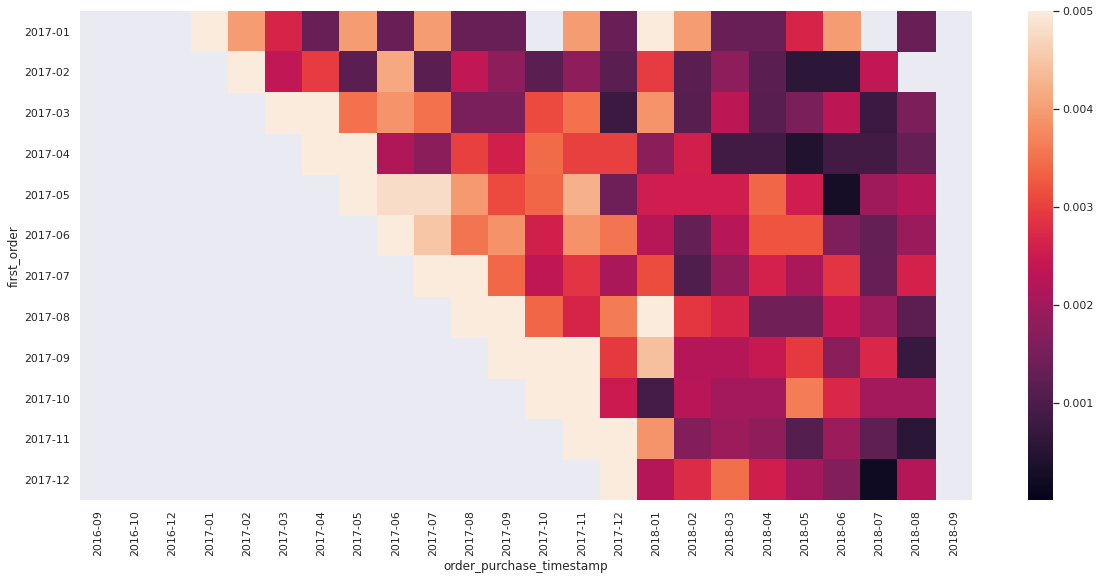

In [118]:
# Построим хитмап, с помощью которого можем посмотреть какие когорты выделяются. Потом с помощью таблицы посмотреть на их Retention. 
sns.set (rc={"figure.figsize": (20, 9)})
sns.heatmap(cohort, vmin=0.0000002, vmax = 0.005)

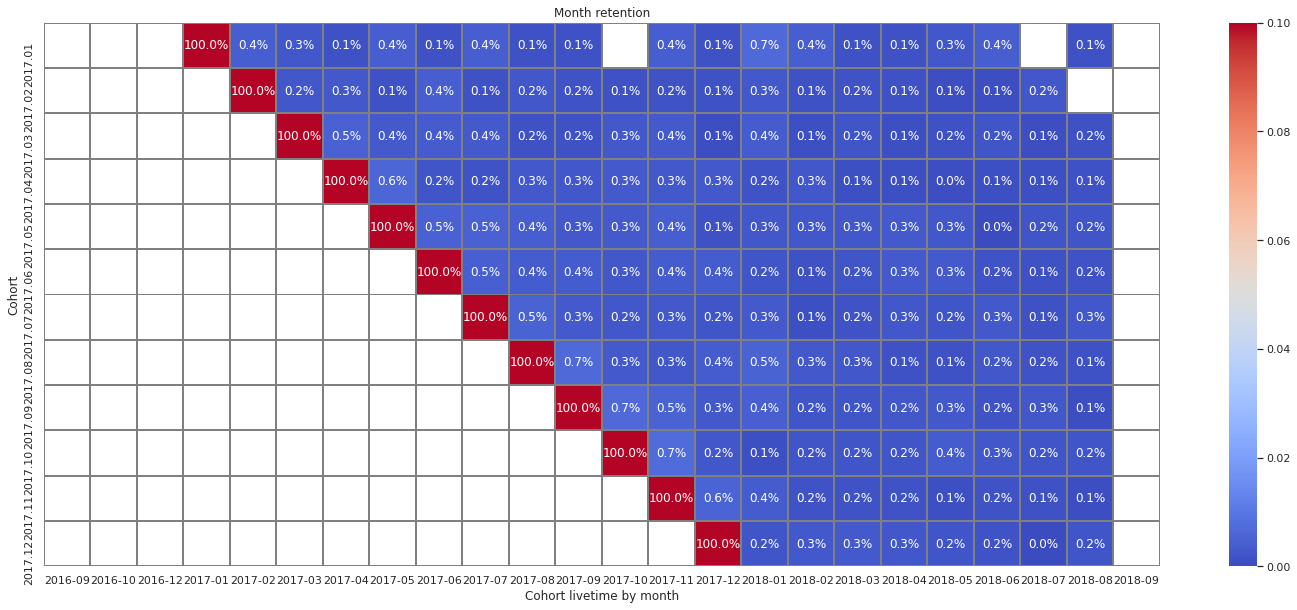

In [121]:
sns.set(style='white')
plt.figure(figsize=(25, 10))
plt.title('Month retention')
plot = sns.heatmap(cohort, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0, vmax = 0.1, 
            cmap = 'coolwarm', yticklabels=cohort.index.strftime('%Y.%m'))
plot.set_xlabel('Cohort livetime by month')
plot.set_ylabel('Cohort')
plt.show()

В итоге самый большой Retention на 3-й месяц у когорты, первая покупка у которой 05-2017 - 0.003954, т.е. 0.395 %.

ЗАДАЧА 6 Построение RFM анализа
R - Recency (Давность) — Как давно клиент совершил покупку.
F - Frequency (Частота) - Сколько покупок совершил клиент.
M - Monetary (Денежная ценность) - Общее количество денег, потраченное клиентом.

In [86]:
# Для начала снова сделаем джоин трех датафреймов.
all_df = items_and_purchases.merge(customers, how = 'inner', on = 'customer_id')

In [87]:
all_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112093,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112094,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112095,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112096,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [88]:
# Отбираем нужные для RFM анализа колонки.
prerfm = all_df.groupby(['customer_unique_id', 'order_id', 'order_purchase_timestamp'], as_index = False) \
               .agg({'price': 'sum'})

In [89]:
prerfm

,customer_unique_id,order_id,order_purchase_timestamp,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00
...,...,...,...,...
98192,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1570.00
98193,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,64.89
98194,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,89.90
98195,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,115.00


In [90]:
# Избавимся от времени в дате.
prerfm['order_purchase_timestamp'] = pd.to_datetime(prerfm['order_purchase_timestamp']).dt.date

In [91]:
prerfm

,customer_unique_id,order_id,order_purchase_timestamp,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14,180.00
...,...,...,...,...
98192,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08,1570.00
98193,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10,64.89
98194,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07,89.90
98195,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02,115.00


In [92]:
prerfm.order_purchase_timestamp.max()

datetime.date(2018, 9, 3)

In [93]:
# Для дальнейшего построения RFM таблицы необходимо определиться, от какой даты мы будем считать дни с момента последней покупки.
# Все таки мы считаем не в динамике,а в статичном датафрейме, поэтому возьмем за основу дату последней покупки.
import datetime
NOW = datetime.date(2018, 9, 3)

In [94]:
# Создаем RFM таблицу. Для этого группируем по уникальному айди клиента, и агририруем (из Now вы читаем последнюю покупку клиента,
# считаем количество заказов на одного клиента и берем сумму, которую потратил каждый клиент).
RFM_table=prerfm.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp': lambda x: (NOW - x.max()).days, # Recency
                                                                      'order_id': lambda x: len(x.unique()), # Frequency
                                                                      'price': lambda x: x.sum()}) # Monetary

In [95]:
# Получаем таблицу с нужными нам данными.Теперь наша задача разделить полученные данные на сегменты.
RFM_table

,customer_unique_id,order_purchase_timestamp,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
94976,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
94977,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
94978,ffff371b4d645b6ecea244b27531430a,573,1,89.90
94979,ffff5962728ec6157033ef9805bacc48,124,1,115.00


In [96]:
# Для удобства переведем колонку с количесвом дней с последней покупки в числовой формат.
RFM_table['order_purchase_timestamp'] = RFM_table['order_purchase_timestamp'].astype(int)

In [97]:
# Переименуем название колонок
RFM_table.rename(columns={'order_purchase_timestamp': 'recency', 
                                      'order_id': 'frequency',
                                      'price': 'monetary'}, inplace=True)

In [98]:
RFM_table

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
94976,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
94977,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
94978,ffff371b4d645b6ecea244b27531430a,573,1,89.90
94979,ffff5962728ec6157033ef9805bacc48,124,1,115.00


In [99]:
RFM_table.describe()

,recency,frequency,monetary
count,94981.000000,94981.000000,94981.000000
mean,243.328055,1.033859,142.072532
std,152.980252,0.210813,216.077000
min,0.000000,1.000000,0.850000
25%,119.000000,1.000000,47.900000
50%,224.000000,1.000000,89.890000
75%,352.000000,1.000000,155.000000
max,729.000000,16.000000,13440.000000


In [100]:
# Так как метод describe не дает нам понять, как разбиты пользователи по количеству покупок, сделаем соответствующую группировку
RFM_table.groupby('frequency') \
         .agg({'customer_unique_id': 'count'})

,customer_unique_id
frequency,
1,92094
2,2651
3,188
4,29
5,9
6,5
7,3
9,1
16,1


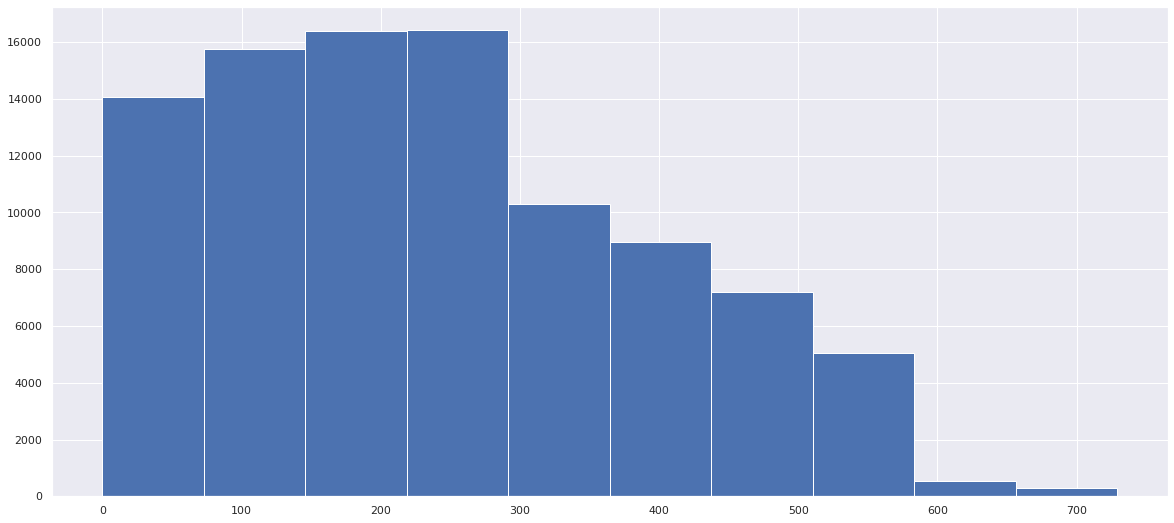

In [101]:
# Для наглядности посмотрим распределение пользователей по дню последней покупки
RFM_table.recency.hist()

Классическая RFM сегментация предполагает деление каждого параметра на 4 сегмента. Мы возьмем деление на 3 сегмента, т.к. у нас небольшая вариация количества покупок (подавляющее большинство пользователей совершило 1 покупку). Для принятия решения как мы будем делить каждую метрику на группы (создавать границы метрик для каждого кластера), необходимо посмотреть на значения этих кластеров. Возьмем разбитие метрик по процентилю с учетом того, что 1 - наихудший показатель, 3 - наилучший показатель:
1. recency (поделим по процентилям 0-25, 25-75 и 75 и далее)  3 - от 0 до 119 дней; 2 - от 120 до 352 дней и 1 - больше 352
2. frequency (будем делить немного подругому, приходится подбирать вручную процентиль) - 3 - от 5 покупок и больше; 2 - 2-4 покупки; 1 - 1 покупка.
3. monetary - (поделим по процентилям 0-25, 25-75 и 75 и далее) 3 - 156 и более, 2 - 48 - 155, 1 - 0 - 47

In [102]:
# Для recency и monetary
quantiles1 = RFM_table.quantile(q=[0.25, 0.75])
quantiles1

,recency,frequency,monetary
0.25,119.0,1.0,47.9
0.75,352.0,1.0,155.0


In [103]:
# Для frequency
quantiles2 = RFM_table.quantile(q=[0.97, 0.9997])
quantiles2

,recency,frequency,monetary
0.9700,549.0,2.0,598.40000
0.9997,699.0,4.0,3117.07906


In [104]:
# Строим 3 разные функции с условиями.
quantiles1
quantiles2
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Функция для Recency
# Аргументы (x = value, p = recency, monetary, frequency, d = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
    
# Функция для Frequency
# Аргументы (x = value, p = recency, monetary, frequency, d = quartiles dict)
def F_Class(x,p,d):
    if x < d[p][0.97]:
        return 1
    elif x <= d[p][0.9997]:
        return 2
    else:
        return 3

# Функция для Monetary    
# Аргументы (x = value, p = recency, monetary, frequency, d = quartiles dict)
def M_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.75]:
        return 2
    else:
        return 3

# Добавляем в датафрейм новые строки
RFM_Segment['R_seg'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles1,))
RFM_Segment['F_seg'] = RFM_Segment['frequency'].apply(F_Class, args=('frequency',quantiles2,))
RFM_Segment['M_seg'] = RFM_Segment['monetary'].apply(M_Class, args=('monetary',quantiles1,))
RFM_Segment['RFMClass'] = RFM_Segment.R_seg.map(str) \
                        + RFM_Segment.F_seg.map(str) \
                        + RFM_Segment.M_seg.map(str)

In [105]:
# Наша RFM-сегментация готова!
RFM_Segment

,customer_unique_id,recency,frequency,monetary,R_seg,F_seg,M_seg,RFMClass
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,3,1,2,312
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,3,213
...,...,...,...,...,...,...,...,...
94976,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,3,113
94977,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,1,2,212
94978,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,2,112
94979,ffff5962728ec6157033ef9805bacc48,124,1,115.00,2,1,2,212


In [106]:
# Для наглядности отберем топ 5 пользьзователей в нашей сегментации.
RFM_Segment[RFM_Segment['RFMClass']=='333'].sort_values('monetary', ascending=False).head()

,customer_unique_id,recency,frequency,monetary,R_seg,F_seg,M_seg,RFMClass
94426,fe81bb32c243a86b2f86fbf053fe6140,74,5,1535.40,3,3,3,333
75203,ca77025e7201e3b30c44b472ff346268,94,7,806.61,3,3,3,333
52350,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,729.62,3,3,3,333
81923,dc813062e0fc23409cd255f7f53c7074,11,6,687.76,3,3,3,333
37370,6469f99c1f9dfae7733b25662e7f1782,67,7,664.20,3,3,3,333
